In [148]:
import rpy2.situation
import rpy2.robjects as robjects
import rpy2.robjects.packages as rpackages
from rpy2.ipython.ggplot import image_png #Function to print out to notebook
import pandas as pd

In [2]:
for row in rpy2.situation.iter_info():
    print(row)

rpy2 version:
3.4.5
Python version:
3.9.5 (default, Nov 23 2021, 15:27:38) 
[GCC 9.3.0]
Looking for R's HOME:
    Environment variable R_HOME: /usr/lib/R
    Calling `R RHOME`: /usr/lib/R
    Environment variable R_LIBS_USER: None
R's additions to LD_LIBRARY_PATH:
/usr/lib/R/lib:/usr/lib/x86_64-linux-gnu:/usr/lib/jvm/default-java/lib/server
R version:
    In the PATH: R version 3.6.3 (2020-02-29) -- "Holding the Windsock"
    Loading R library from rpy2: OK
Additional directories to load R packages from:
None
C extension compilation:
  include:
  ['/usr/share/R/include']
  libraries:
  ['R', 'pcre2-8', 'pcre', 'lzma', 'bz2', 'z', 'rt', 'dl', 'm', 'icuuc', 'icui18n']
  library_dirs:
  ['/usr/lib/R/lib']
  extra_compile_args:
  []
  extra_link_args:
  ['-Wl,--export-dynamic', '-fopenmp', '-Wl,-Bsymbolic-functions', '-Wl,-z,relro']


Importing packages needed for this notebook

In [31]:
base = rpackages.importr('base')
ggplot2 = rpackages.importr('ggplot2')
utils = rpackages.importr('utils')
datasets = rpackages.importr('datasets')
stats = rpackages.importr('stats')

Installing packages.

1) list packages that are needed.
2) check if packages are installed
3) Install packages if not installed

In [4]:
utils.chooseCRANmirror(ind=1)
packages = ['MCMCglmm', 'reshape2', 'lme4']
install = [package for package in packages if not rpackages.isinstalled(package)]

for package in install:
    utils.install_packages(robjects.vectors.StrVector(package))

Everything in rpy2 is emedded R and accessed through rpy2.robjects.r

In [28]:
print(robjects.r['pi'][0])
piplus = robjects.r['pi'][0] + 2
print(piplus)

3.141592653589793
5.141592653589793


In R data is represented in vectors and matricies. Vectors can be initialised using the Vectors object

*note:* repr() is a function to represent string and binaries of objects 

In [6]:
string_vector = robjects.StrVector(['Hello', 'World'])
print(string_vector.r_repr())

int_vector = robjects.IntVector([0, 1, 2, 3, 4])
print(int_vector)

float_vector = robjects.FloatVector([0.0, 1.1, 2.2, 3.3, 4.4, 5.5])
print(float_vector)


c("Hello", "World")
[1] 0 1 2 3 4

[1] 0.0 1.1 2.2 3.3 4.4 5.5



Calling r functions. Similar to python.

In [7]:
matrix = robjects.r['matrix'](float_vector, nrow=2)
print(matrix)

     [,1] [,2] [,3]
[1,]  0.0  2.2  4.4
[2,]  1.1  3.3  5.5



Getting help

In [8]:
help_doc = utils.help('help')
print(help_doc[0])

/usr/lib/R/library/utils/help/help


## Examples

First import the data

In [26]:
r = robjects.r
mtcars = robjects.packages.data(datasets).fetch('mtcars')['mtcars']

### Graphs and plots

1. Get data.

2. Plotting in base R

3. plotting using ggplot2



In [29]:
r.X11() 
r.layout(r.matrix(robjects.IntVector([1,2,3,4]), nrow=2, ncol=2))
r.plot(mtcars)

<rpy2.rinterface_lib.sexp.NULLType object at 0x7faa09cd8b00> [RTYPES.NILSXP]

R[write to console]: `geom_smooth()` using formula 'y ~ x'



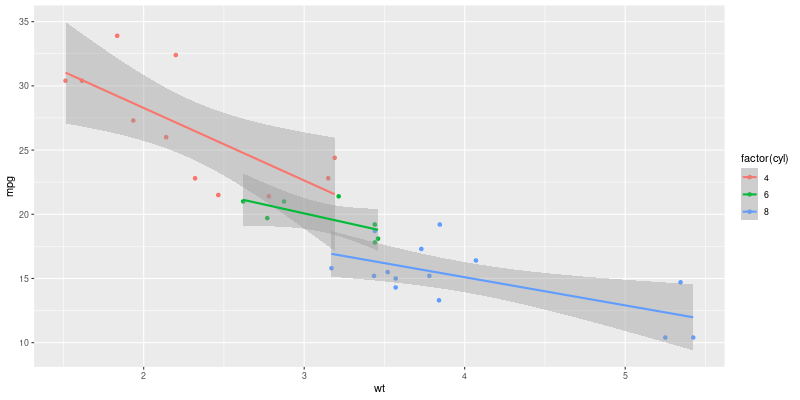

In [135]:
pp = (ggplot2.ggplot(mtcars) + ggplot2.aes_string(x='wt', y='mpg', col='factor(cyl)') +
      ggplot2.geom_point() + ggplot2.geom_smooth(ggplot2.aes_string(group='cyl'), method='lm')
      )
#pp.plot() This plots in a seperate (and very annoying window)
image_png(pp)

## Fitting linear models


Going to be slicing the dataframe in both R and python. Dataframe slicing in both is identical for columns but different fir rows and individual values.

In [136]:
fit = stats.glm('mpg ~ cyl + wt -1', family='Gamma', data=mtcars)
summary = base.summary(fit)
print(summary.rx2('coefficients'))

       Estimate   Std. Error  t value     Pr(>|t|)
cyl 0.003676666 0.0009649056 3.810389 6.412005e-04
wt  0.009645158 0.0018712640 5.154354 1.506505e-05



Another way when in an ipython kernel is to use the "R magic" which lets any cell that contain %%R to run R code in the python run time.

Use ?%%R to get full output. *note* It seems that the %%R cell cannot communicate with other cells and cannot run python code in it. This seems like a good way to run isolated R code.

In [ ]:
%load_ext rpy2.ipython


Call:
glm(formula = mpg ~ cyl + wt - 1, family = Gamma, data = mtcars)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.18371  -0.09019  -0.01740   0.09807   0.25471  

Coefficients:
     Estimate Std. Error t value Pr(>|t|)    
cyl 0.0036767  0.0009649   3.810 0.000641 ***
wt  0.0096452  0.0018713   5.154 1.51e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Gamma family taken to be 0.01427085)

    Null deviance:     NaN  on 32  degrees of freedom
Residual deviance: 0.41904  on 30  degrees of freedom
AIC: 147.43

Number of Fisher Scoring iterations: 4



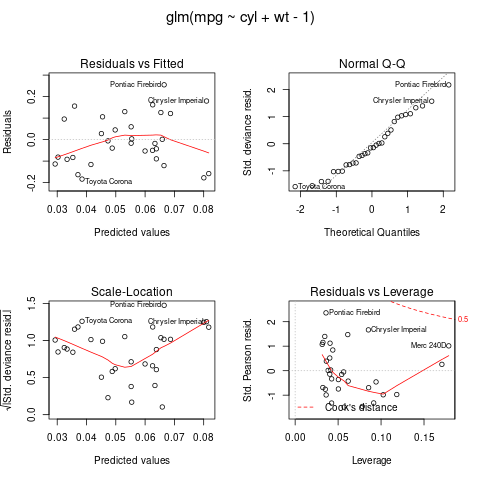

In [ ]:
%%R
data(mtcars)
fit <- glm(mpg ~ cyl + wt -1, family=Gamma, data=mtcars)
print(summary(fit))
par(mfrow =c(2,2), oma=c(0, 0, 2, 0))
plot(fit)


## Pandas to R and back again


In [137]:
pd_df = pd.DataFrame({'int_values': [1,2,3],
                      'str_values': ['abc', 'def', 'ghi']})

pd_df

,int_values,str_values
0,1,abc
1,2,def
2,3,ghi


In [138]:
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

In [140]:
with localconverter(robjects.default_converter + pandas2ri.converter):
    r_df = robjects.conversion.py2rpy(pd_df)

print(r_df)

print(base.summary(r_df))

  int_values str_values
0          1        abc
1          2        def
2          3        ghi

   int_values   str_values       
 Min.   :1.0   Length:3          
 1st Qu.:1.5   Class :character  
 Median :2.0   Mode  :character  
 Mean   :2.0                     
 3rd Qu.:2.5                     
 Max.   :3.0                     



In [142]:
with localconverter(robjects.default_converter + pandas2ri.converter):
    cars_python = robjects.conversion.rpy2py(mtcars)

cars_python

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6.0,160.0,110.0,3.90,2.620,16.46,0.0,1.0,4.0,4.0
Mazda RX4 Wag,21.0,6.0,160.0,110.0,3.90,2.875,17.02,0.0,1.0,4.0,4.0
Datsun 710,22.8,4.0,108.0,93.0,3.85,2.320,18.61,1.0,1.0,4.0,1.0
Hornet 4 Drive,21.4,6.0,258.0,110.0,3.08,3.215,19.44,1.0,0.0,3.0,1.0
Hornet Sportabout,18.7,8.0,360.0,175.0,3.15,3.440,17.02,0.0,0.0,3.0,2.0
Valiant,18.1,6.0,225.0,105.0,2.76,3.460,20.22,1.0,0.0,3.0,1.0
Duster 360,14.3,8.0,360.0,245.0,3.21,3.570,15.84,0.0,0.0,3.0,4.0
Merc 240D,24.4,4.0,146.7,62.0,3.69,3.190,20.00,1.0,0.0,4.0,2.0
Merc 230,22.8,4.0,140.8,95.0,3.92,3.150,22.90,1.0,0.0,4.0,2.0
Merc 280,19.2,6.0,167.6,123.0,3.92,3.440,18.30,1.0,0.0,4.0,4.0


### Finally the Enviornment

In [147]:
robjects.globalenv['pi'] = 3.14
robjects.r.ls(robjects.globalenv)

'pi'
